In [1]:
from keras.datasets import fashion_mnist

(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

In [3]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)


In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

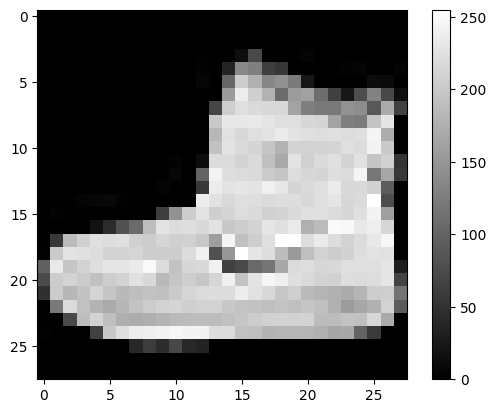

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.show()

Normalize the data, from a range of 0 to 255 translate to a range of 0 to 1.

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Linear function

$$A(x) = x$$.

The linear function is a straight line and it is proportional to the input.

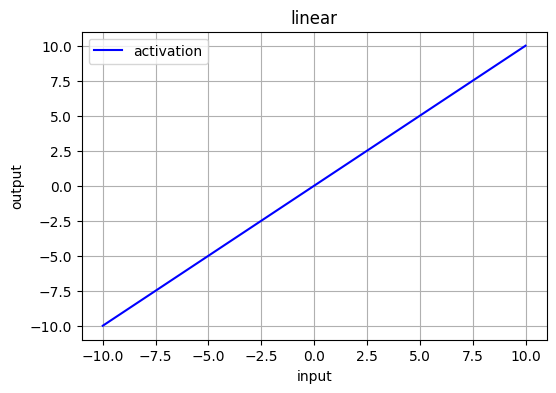

In [15]:
from keras.activations import linear
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-10, 10, 100)
y = linear(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, c='b', label='activation')
plt.ylabel('output')
plt.xlabel('input')
plt.title('linear')
plt.legend()
plt.grid();


The derivative of such a function with respect to $x$ is:

$$\frac{∂A}{∂x} = 1$$

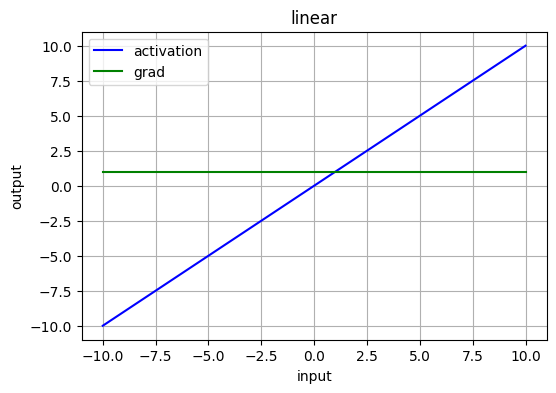

In [14]:
x = np.linspace(-10, 10, 100)
y = linear(x)

grad_y = np.ones_like(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, c='b', label='activation')
plt.plot(x, grad_y, c='g', label='grad')
plt.ylabel('output')
plt.xlabel('input')
plt.title('linear')
plt.legend()
plt.grid();

For this function, the derivative is always the same at any point.

This means that the gradient has nothing to do with the input ( x ). The gradient is a constant vector, and the descent follows a constant gradient. If there is an erroneous prediction, then the changes made by the back propagation of the error are also constant regardless of the input.

### Sigmoid

Sigmoid is one of the most frequent activation functions in neural networks.


$$A(x) = \frac{1}{1 + e^{-x}}$$

**Benefits:**
1. A sigmoid is a **nonlinear function**, and the combination of such functions produces a nonlinear function as well. Which means the linear function problem is irrelevant here, we can train **many layers** in a row and it will make sense.
2. In the range of signal values from -2.5 to 2.5, the activation values change very quickly. Which means that any change in signal value in this region will cause a significant change in activation value.
3. Sigmoid is ideal for **binary classification** tasks. It tends to bring the values to one side of the curve, resulting in clear prediction bounds
4. Sigmoid has a fixed range of function values - [0,1], while linear function has a range ($-∞$, $+∞$). This means that in the case of the sigmoid **there will be no errors** with large activation values

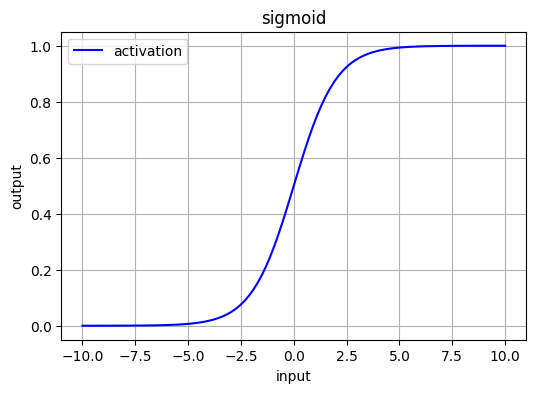

In [17]:
from keras.activations import sigmoid


x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, c='b', label='activation')
plt.ylabel('output')
plt.xlabel('input')
plt.title('sigmoid')
plt.legend()
plt.grid();

$$\sigma(z) = \frac{1}{1 + exp(-z)}$$

$$\frac{d\sigma(z)}{dz} = -\frac{1}{(1 + exp(-z))^2}(-exp(-z)) = \frac{exp(-z)}{(1 + exp(-z))^2} \text{(*)} = \frac{1}{1 + exp(-z)}(1-\frac{1}{1 + exp(-z)}) = \sigma(1-\sigma)$$

$ (*)\frac{exp(-z) +1-1}{(1 + exp(-z))^2} = \frac{1 + exp(-z) -1}{(1 + exp(-z))^2}= \frac{1 + exp(-z)}{(1 + exp(-z))^2} - \frac{1}{(1 + exp(-z))^2}=$

$ = \frac{1}{(1 + exp(-z))} - \frac{1}{(1 + exp(-z))}\frac{1}{(1 + exp(-z))} = \frac{1}{(1 + exp(-z))}(1- \frac{1}{(1 + exp(-z))}) $

In [18]:
def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

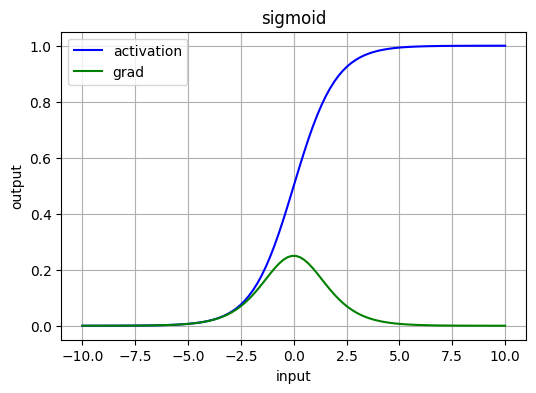

In [20]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

grad_y = sigmoid_grad(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, c='b', label='activation')
plt.plot(x, grad_y, c='g', label='grad')
plt.ylabel('output')
plt.xlabel('input')
plt.title('sigmoid')
plt.legend()
plt.grid();

When approaching the ends of the sigmoid, the activation values change very slightly. This means that the gradient in such regions has very small values. And because of this, the problem of damped gradients is born

The gradient turns out to be so small or even zero that learning freezes or goes very slowly.

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten# Add this line
tf.random.set_seed(9)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(10, activation='sigmoid')
])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD  # Correct import for SGD

# Define optimizer and loss function
optimizer = SGD(learning_rate=0.01)
loss_fn = CategoricalCrossentropy()


In [25]:
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=X_train.shape[0]).batch(batch_size)

In [26]:
for X, y in train_dataset:
    print(X.shape)
    break

(64, 28, 28)


In [27]:
grad_log = []

epochs = 2

for epoch in range(epochs):
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        with tf.GradientTape() as tape:
            preds = model(x_batch_train)

            loss_value = loss_fn(y_batch_train, preds)

            grads = tape.gradient(loss_value, model.trainable_weights)
            g_g = []

            for g_s in grads:
                if len(g_s.numpy().shape) == 2:
                    g_g.append(g_s.numpy()[0, 0])

        grad_log.append(g_g)

        optimizer.apply_gradients(zip(grads, model.trainable_weights))


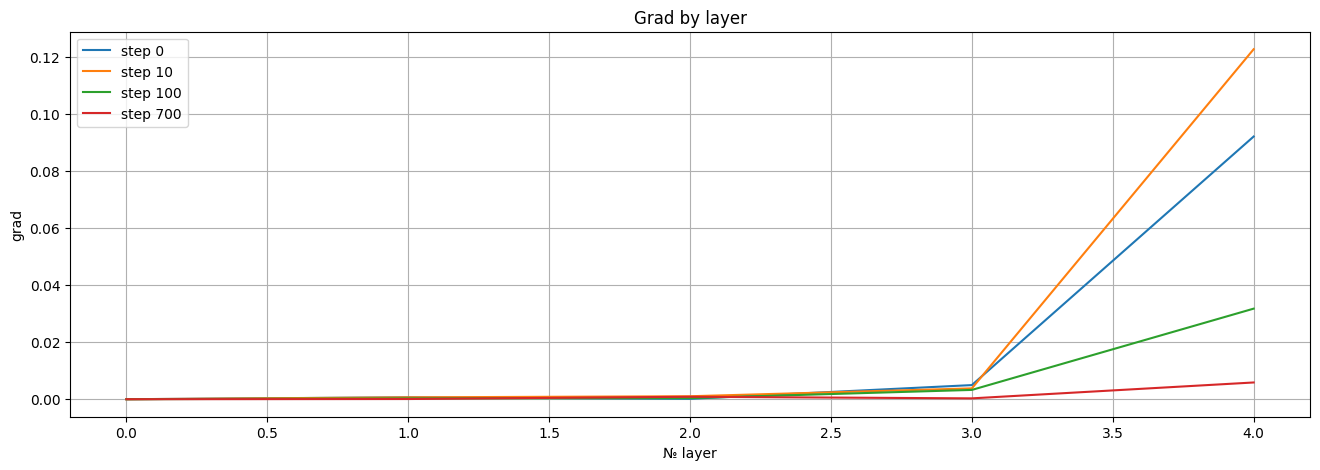

In [28]:
grad_log = np.array(grad_log)

plt.figure(figsize=(16, 5))
plt.title('Grad by layer')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0, :]), label='step 0')
plt.plot(np.abs(grad_log[10, :]), label='step 10')
plt.plot(np.abs(grad_log[100, :]), label='step 100')
plt.plot(np.abs(grad_log[700, :]), label='step 700')
plt.legend()
plt.show()

### Tangent

$$tanh(x)={\frac {e^{x}-e^{-x}}{e^{x}+e^{-x}}}={\frac {e^{2x}-1}{e^{2x}+1}} = 2σ(2x) - 1$$

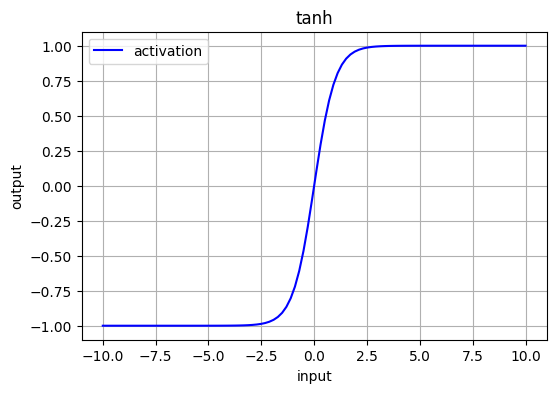

In [29]:
from keras.activations import tanh


x = np.linspace(-10, 10, 100)
y = tanh(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, c='b', label='activation')
plt.ylabel('output')
plt.xlabel('input')
plt.title('tanh')
plt.legend()
plt.grid();

$$∂\tanh(z) = \frac{1}{ch^2(x)} = \frac{1}{(\frac{e^x + e^{-x}}{2})^2}$$

$$ch(x) = \frac{e^x + e^{-x}}{2}$$

In [30]:
def tanh_grad(x):
    return 1 / (np.exp(x) + np.exp(-x) / 2) ** 2

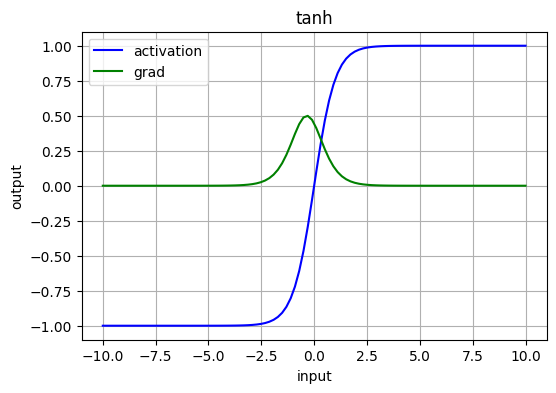

In [31]:
x = np.linspace(-10, 10, 100)
y = tanh(x)

grad_y = tanh_grad(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, c='b', label='activation')
plt.plot(x, grad_y, c='g', label='grad')
plt.ylabel('output')
plt.xlabel('input')
plt.title('tanh')
plt.legend()
plt.grid();

The hyperbolic tangent is very similar to the sigmoid, except that its derivative is slightly larger, but all the other pros and cons remain.

**Plusses:**

1- The tangent is a **nonlinear function**, we can train many layers in a row and it will make sense.

2. In the -2.5 to 2.5 range of signal values, the activation values change very quickly. This means that any change in the signal value in this region will cause a significant change in the activation value.

3- Tangent is ideal for **binary classification** problems. It tends to bring the values to one side of the curve.

4. Tangent has a fixed range of function values - [-1,1]. This means there will be no errors with large atkivation values


**Minuses:**
1. When approaching the ends of the tangent, the activation values change very weakly. We have the problem of **damped gradients**.

### ReLU


$$A(x) = max(0, x)$$.

It may seem that ReLU has all the same problems as a linear function. But in fact, ReLU is nonlinear. Which means we can create many layers in a row.

ReLU is less computationally demanding than tangent or sigmoid, so ReLU is popular for creating deep neural networks.

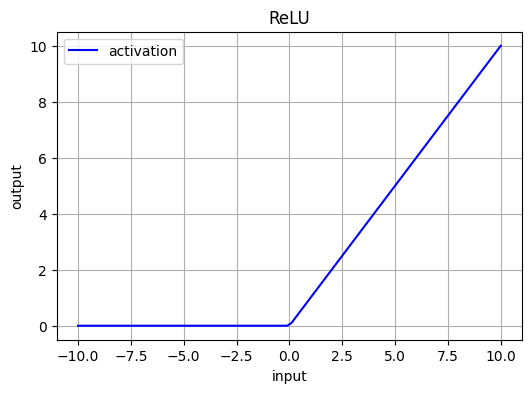

In [33]:
from keras.activations import relu


x = np.linspace(-10, 10, 100)
y = relu(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, c='b', label='activation')
plt.ylabel('output')
plt.xlabel('input')
plt.title('ReLU')
plt.legend()
plt.grid();

In [34]:
def relu_grad(x):
    return np.where(x >= 0, 1, 0)

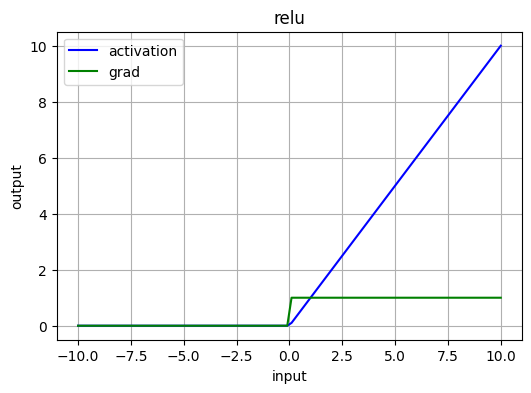

In [35]:
x = np.linspace(-10, 10, 100)
y = relu(x)

grad_y = relu_grad(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, c='b', label='activation')
plt.plot(x, grad_y, c='g', label='grad')
plt.ylabel('output')
plt.xlabel('input')
plt.title('relu')
plt.legend()
plt.grid();


Let's verify that the problem of fading gradients is no longer present.

In [36]:
tf.random.set_seed(9)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='sigmoid')
])


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
optimizer = SGD(learning_rate=0.01)
loss_fn = CategoricalCrossentropy()

In [38]:
grad_log = []

epochs = 2

for epoch in range(epochs):
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        with tf.GradientTape() as tape:
            preds = model(x_batch_train)

            loss_value = loss_fn(y_batch_train, preds)

            grads = tape.gradient(loss_value, model.trainable_weights)
            g_g = []

            for g_s in grads:
                if len(g_s.numpy().shape) == 2:
                    g_g.append(g_s.numpy()[0, 0])

        grad_log.append(g_g)

        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        if step % 200 == 0:
            print(f'Epoch {epoch + 1}/{epochs}', end='. ')
            print(f'Step {step}. Train loss: {loss_value}')

Epoch 1/2. Step 0. Train loss: 2.3743038177490234
Epoch 1/2. Step 200. Train loss: 1.7785162925720215
Epoch 1/2. Step 400. Train loss: 1.1137996912002563
Epoch 1/2. Step 600. Train loss: 0.8698084950447083
Epoch 1/2. Step 800. Train loss: 0.7752126455307007
Epoch 2/2. Step 0. Train loss: 0.7749625444412231
Epoch 2/2. Step 200. Train loss: 0.7970634698867798
Epoch 2/2. Step 400. Train loss: 0.5839606523513794
Epoch 2/2. Step 600. Train loss: 0.5394878387451172
Epoch 2/2. Step 800. Train loss: 0.564748227596283


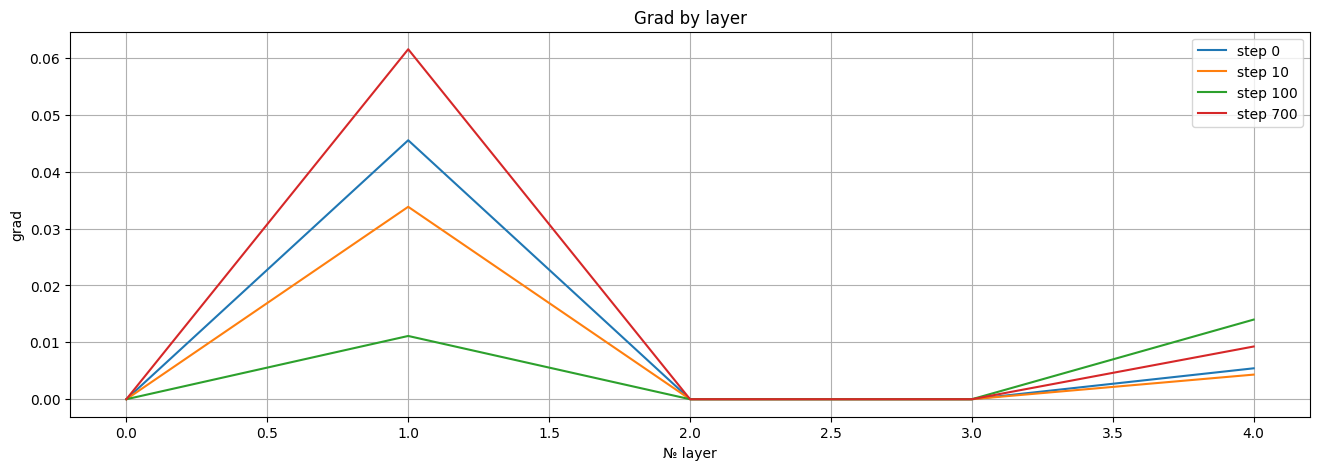

In [39]:
grad_log = np.array(grad_log)

plt.figure(figsize=(16, 5))
plt.title('Grad by layer')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0, :]), label='step 0')
plt.plot(np.abs(grad_log[10, :]), label='step 10')
plt.plot(np.abs(grad_log[100, :]), label='step 100')
plt.plot(np.abs(grad_log[700, :]), label='step 700')
plt.legend()
plt.show()

#### Problem


If we have a large neural network with a huge number of neurons, using a sigmoid or hyperbolic tangent will cause **activation of literally all neurons**. And ideally one wants some neurons to not be activated, so that the network is lighter.

ReLu can do that. For example, if we have a neural network with randomly initialized weights, then 50% of activations are 0 by ReLU.

But there's a problem here as well. The gradient on this part is 0. Which means that the weights of the network will not change during training.


But there are modifications of ReLU that help to solve this problem.


### Leaky ReLU


$$A(x) = max(0.1x, x)$$$


For example, to solve the zero gradient problem, it makes sense to replace the horizontal part of the function with a linear one.

We get a slightly deviated line from the horizontal position. The idea is to make the gradient unequal to zero and gradually restore it during training.

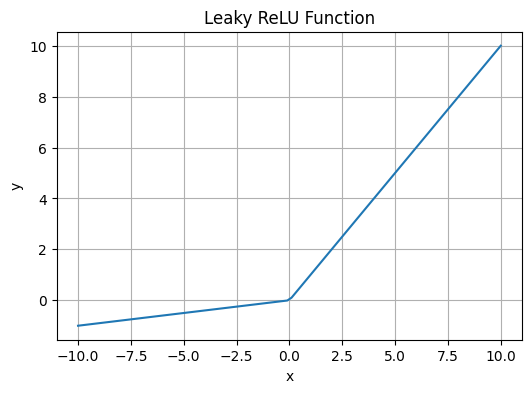

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Leaky ReLU function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Generate some input data
x = np.linspace(-10, 10, 100)

# Apply the Leaky ReLU function
y = leaky_relu(x, alpha=0.1)

# Plot the result
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.title("Leaky ReLU Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [42]:
def leaky_relu_grad(x):
    return np.where(x >= 0, 1, 0.1)

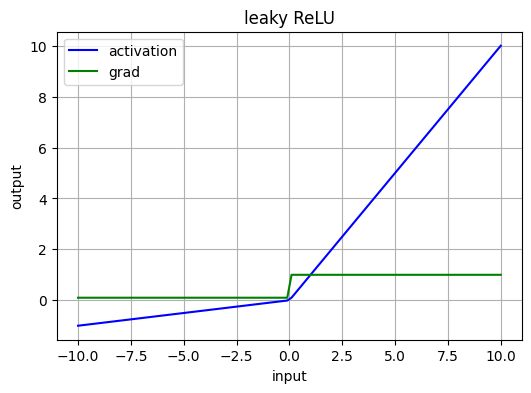

In [43]:
x = np.linspace(-10, 10, 100)
y = leaky_relu(x, alpha=0.1)

grad_y = leaky_relu_grad(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, c='b', label='activation')
plt.plot(x, grad_y, c='g', label='grad')
plt.ylabel('output')
plt.xlabel('input')
plt.title('leaky ReLU')
plt.legend()
plt.grid();

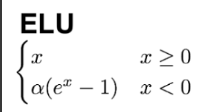

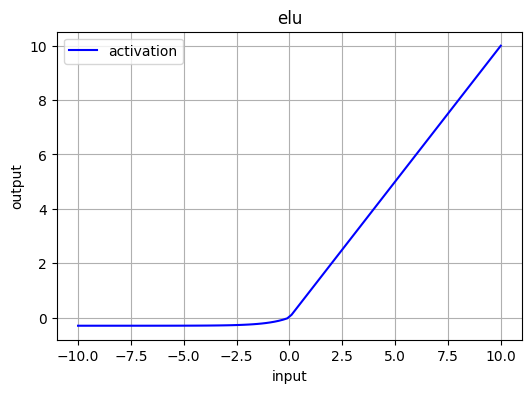

In [46]:
from keras.activations import elu
x = np.linspace(-10, 10, 100)
alpha = 0.3
y = elu(x, alpha=alpha)

plt.figure(figsize=(6,4))
plt.plot(x, y, c='b', label='activation')
plt.ylabel('output')
plt.xlabel('input')
plt.title('elu')
plt.legend()
plt.grid();

In [47]:
def elu_grad(x):
    return np.where(x >= 0, 1, elu(x, alpha=alpha) + alpha)

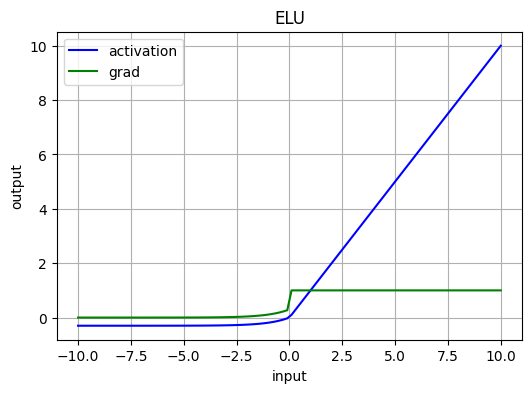

In [49]:
x = np.linspace(-10, 10, 100)
y = elu(x, alpha=alpha)

grad_y = elu_grad(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, c='b', label='activation')
plt.plot(x, grad_y, c='g', label='grad')
plt.ylabel('output')
plt.xlabel('input')
plt.title('ELU')
plt.legend()
plt.grid();

How do you choose an activation function?

As with all deep learning, there is no obvious answer here. Choose the feature that leads to faster learning.

There is only one clear answer regarding the activation function on the last layer. If you have a classification task, then the best candidate is sigmoid, since it essentially outputs the probability of being one class or the other.


And if you have a regression task, choose ReLU - if you can't have a negative target value or linear activation.





In [50]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='sigmoid')
])


model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

For this purpose we will put very large weights.

Such weights can be obtained if the gradient is always large.

In [51]:
np.random.seed(9)

new_weights = []

for weights in model.get_weights():
    if len(weights.shape) == 2:
        new_weights.append(np.random.randn(weights.shape[0], weights.shape[1]) * 100)
    else:
        new_weights.append(np.random.randn(weights.shape[0]) * 100)

model.set_weights(new_weights)

model.get_weights()[:2]

[array([[ 1.10855468e-01, -2.89544067e+01, -1.11606628e+02, ...,
          2.70807247e+01, -1.09553963e+02,  2.40134293e+02],
        [-2.79909744e+01,  2.03080078e+02, -8.19394684e+00, ...,
         -3.82227927e-01,  1.05748680e+02, -9.83664932e+01],
        [ 1.08536072e+02,  3.65864944e+01, -1.09298759e+02, ...,
         -5.81144371e+01,  4.14889984e+01,  1.60726120e+02],
        ...,
        [ 1.35224182e+02,  2.94914799e+01,  1.18652184e+02, ...,
          4.81741476e+00, -2.53905319e+02, -4.74941177e+01],
        [-3.37093697e+01,  1.03940331e+02,  1.14126289e+02, ...,
          1.74861115e+02,  4.74479866e+00,  1.33079357e+01],
        [ 2.64444885e+01, -1.50783691e+02,  1.20068794e+02, ...,
          7.30409470e+01,  9.83183594e+01,  1.32491974e+02]], dtype=float32),
 array([ -81.39623  ,   17.539917 ,  -72.668785 ,    2.2356956,
          33.181274 ,  119.915825 ,   89.62817  ,  -21.945011 ,
        -127.10773  ,   84.82333  , -114.00925  , -107.28623  ,
        -105.227394 , 

In [52]:
optimizer =SGD(learning_rate=0.01)
loss_fn = CategoricalCrossentropy()

And we see that the error cannot be counted, something has gone wrong.

In [53]:
grad_log = []

epochs = 2

for epoch in range(epochs):
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        with tf.GradientTape() as tape:
            preds = model(x_batch_train)

            loss_value = loss_fn(y_batch_train, preds)

            grads = tape.gradient(loss_value, model.trainable_weights)
            g_g = []

            for g_s in grads:
                if len(g_s.numpy().shape) == 2:
                    g_g.append(g_s.numpy()[0, 0])

        grad_log.append(g_g)

        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        if step % 200 == 0:
            print(f'Epoch {epoch + 1}/{epochs}', end='. ')
            print(f'Step {step}. Train loss: {loss_value}')

Epoch 1/2. Step 0. Train loss: 63276142559232.0
Epoch 1/2. Step 200. Train loss: nan
Epoch 1/2. Step 400. Train loss: nan
Epoch 1/2. Step 600. Train loss: nan
Epoch 1/2. Step 800. Train loss: nan
Epoch 2/2. Step 0. Train loss: nan
Epoch 2/2. Step 200. Train loss: nan
Epoch 2/2. Step 400. Train loss: nan
Epoch 2/2. Step 600. Train loss: nan
Epoch 2/2. Step 800. Train loss: nan


In [54]:
model.get_weights()[:2]

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, 

But we can change the ReLU activation function.

Previously, it had no upward constraints, so the activation output values could be very large.

But now we'll put a limit of 6 to calm down our signals and therefore the weights.

In [60]:
import tensorflow as tf
from tensorflow.keras import backend as K

def my_relu(x):
    return tf.keras.activations.relu(x, max_value=6)

# Example usage:
x = tf.constant([-3.0, 0.0, 2.0, 5.0, 8.0])
y = my_relu(x)
print(y)  # Output: [0. 0. 2. 5. 6.]


tf.Tensor([0. 0. 2. 5. 6.], shape=(5,), dtype=float32)


In [61]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=my_relu),
    Dense(64, activation=my_relu),
    Dense(32, activation=my_relu),
    Dense(16, activation=my_relu),
    Dense(10, activation='sigmoid')
])


model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.set_weights(new_weights)

In [63]:
optimizer = SGD(learning_rate=0.01)
loss_fn = CategoricalCrossentropy()

In [64]:
grad_log = []

epochs = 2

for epoch in range(epochs):
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        with tf.GradientTape() as tape:
            preds = model(x_batch_train)

            loss_value = loss_fn(y_batch_train, preds)

            grads = tape.gradient(loss_value, model.trainable_weights)
            g_g = []

            for g_s in grads:
                if len(g_s.numpy().shape) == 2:
                    g_g.append(g_s.numpy()[0, 0])

        grad_log.append(g_g)

        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        if step % 200 == 0:
            print(f'Epoch {epoch + 1}/{epochs}', end='. ')
            print(f'Step {step}. Train loss: {loss_value}')

Epoch 1/2. Step 0. Train loss: 1805.9508056640625
Epoch 1/2. Step 200. Train loss: 1764.3140869140625
Epoch 1/2. Step 400. Train loss: 1877.26513671875
Epoch 1/2. Step 600. Train loss: 1684.81298828125
Epoch 1/2. Step 800. Train loss: 1383.83154296875
Epoch 2/2. Step 0. Train loss: 1476.7314453125
Epoch 2/2. Step 200. Train loss: 1450.819580078125
Epoch 2/2. Step 400. Train loss: 1286.35888671875
Epoch 2/2. Step 600. Train loss: 1123.316162109375
Epoch 2/2. Step 800. Train loss: 1073.596923828125


In [65]:
model.get_weights()[:2]

[array([[ 1.10855468e-01, -2.89544067e+01, -1.11606628e+02, ...,
          2.70807247e+01, -1.09553963e+02,  2.40134293e+02],
        [-2.79909744e+01,  2.03080078e+02, -8.19394684e+00, ...,
         -3.82227927e-01,  1.05748680e+02, -9.83664932e+01],
        [ 1.08536072e+02,  3.65864944e+01, -1.09298759e+02, ...,
         -5.81144371e+01,  4.14889984e+01,  1.60726120e+02],
        ...,
        [ 1.35224182e+02,  2.94914799e+01,  1.18652184e+02, ...,
          4.81741476e+00, -2.53905319e+02, -4.74941177e+01],
        [-3.37093697e+01,  1.03940331e+02,  1.14126289e+02, ...,
          1.74861115e+02,  4.74479866e+00,  1.33079357e+01],
        [ 2.64444885e+01, -1.50783691e+02,  1.20068794e+02, ...,
          7.30409470e+01,  9.83183594e+01,  1.32491974e+02]], dtype=float32),
 array([ -81.39623  ,   17.539917 ,  -72.668785 ,    2.2356956,
          33.181274 ,  119.915825 ,   89.62817  ,  -21.945011 ,
        -127.10773  ,   84.82333  , -114.00925  , -107.28623  ,
        -105.227394 , 

<table> <tr> <th> Activation Function </th> <th> Advantages </th> <th> Disadvantages </th> </tr> <tr> <td> Linear </td> <td> 1. Less computational time </td> <td> 1. Linear function 2. Unfixed range of values — [-∞, +∞] </td> </tr> <tr> <td> Sigmoid </td> <td> 1. Non-linear function 2. Activation values change quickly in the signal range from -2.5 to 2.5 3. Fixed range of values — [0, 1] </td> <td> 1. Vanishing gradients </td> </tr> <tr> <td> Tanh </td> <td> 1. Non-linear function 2. Activation values change quickly in the signal range from -2.5 to 2.5 3. Fixed range of values — [-1, 1] </td> <td> 1. Vanishing gradients </td> </tr> <tr> <td> ReLU </td> <td> 1. Less computational time 2. Lighter network weights 3. No vanishing gradient problem </td> <td> 1. Zero gradients for signals less than 0 2. Unfixed range of values </td> </tr> <tr> <td> Leaky ReLU </td> <td> 1. No problem with zero gradients </td> <td> 1. Need to adjust the alpha value 2. Unfixed range of values </td> </tr> <tr> <td> ELU </td> <td> 1. No problem with zero gradients 2. Negative outputs help the neural network direct weights in the right direction </td> <td> 1. More computational time 2. Unfixed range of values 3. Need to adjust the alpha value </td> </tr> </table>


